# SciPy - Biblioteca de algorítmos científicos para Python

J.R. Johansson (jrjohansson at gmail.com), traducido por P. Gzlez. Rodelas (prodelas at gmail.com)

La última versión de este [IPython notebook](http://ipython.org/notebook.html) notebook está disponible en [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

Otros notebooks de de esta misma serie se encuentran indexados en [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [8]:
#    Aquí cargamos el módulo 'pyplot' dentro del paquete 'matplotlib' 
# con el pseudónimo 'plt', así como el módulo 'Image' dentro del paquete
# 'display' de IPython, indicando que los gráficos los muestre en línea
# dentro del mismo notebook de IPython.

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Introducción

Toda la infraestructura de SciPy está construida a partir de la que proporciona NumPy para el manejo de arrays multidimensionales, y proporciona un gran número de algoritmos científicos de alto nivel. Alguno de los temas que cubre SciPy son:

* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integración ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformadas de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de Señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra Lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Problemas de Valores Propios de matrices huecas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de Imágenes Multi-dimensional ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/Salida de ficheros ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Cada uno de estos submódulos proporciona un determinado número de funciones y clases que pueden ser usadas para resolver problemas relacionados con sus respectivos temas.

En este notebook se explorará y expondrá cómo usar alguno de estos paquetes o submódulos.

Para acceder al paquete SciPy en un programa de Python, empezaremos importándolo todo desde el módulo `scipy`, tal y cómo sigue.

In [9]:
from scipy import *

Pero si lo que necesitamos es sólo una parte concreta de la extensa infraestructura de SciPy podremos selectivamente incluir sólo aquellos módulos en los que estemos interesados. Por ejemplo, para incluir tan sólo el paquete de álgebra lineal bajo el pseudónimo `la`, podemos simplemente:

In [10]:
import scipy.linalg as la

##  Funciones especiales

Un gran número de funciones matemáticas especiales resultan importantes para numerosos problemas computacionales en Física e Ingeniería. SciPy proporciona implementaciones de una extensa colección de funciones especiales. Para más detalles, consultar la lista completa de estas funciones en la documención de referencia en http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Para mostrar el uso típico de estas funciones especiales veremos con más detalle el caso de las funciones de Bessel:

In [4]:
#
# El módulo scipy.special incluye un gran número de funciones de Bessel.
# Aquí de momento usaremos las funciones jn e yn, que corresponden con las
# funciones de Bessel de primera y segunda especie con valores reales. 
# También incluiremos los procedimientos jn_zeros e yn_zeros que nos 
# proporcionan los ceros de estas funciones, jn e yn, respectivamente.
#

from scipy.special import jn, yn, jn_zeros, yn_zeros

In [5]:
n = 0    # orden
x = 0.0

# función de Bessel de primera especie
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# función de Bessel de segunda especie
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


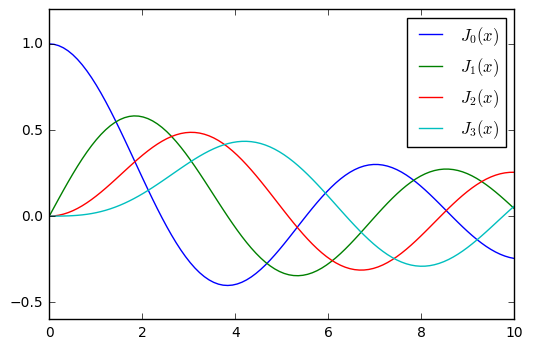

In [6]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

In [7]:
# ceros de las funciones de Bessel
n = 0 # orden
m = 4 # número de raíces a calcular
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Integración

### Integración numérica: cuadratura ("quadrature" en inglés)

Se trata de calcular numéricamente la integral definida de una cierta función

$\displaystyle \int_a^b f(x) dx$

que también se suele denominar *cuadratura numérica*, o simplemente *cuadratura*. SciPy proporciona ciertos procedimientos para diferentes tipos de cuadratura, por ejemplo: `quad`, `dblquad` y `tplquad` para integrales simples, dobles o triples, respectivamente.



In [8]:
from scipy.integrate import quad, dblquad, tplquad

La función o procedimiento `quad` también puede tener un gran número de argumentos opcionales que nos permitirán afinar bastante el comportamiento de dicho procedimiento (pruebe con `help(quad)` para obtener más detalles).

El uso básico sería el siguiente:

In [9]:
# primero debemos disponer de una cierta función para el integrando
def f(x):
    return x

In [10]:
x_min = 0 # el límite inferior de integración en x
x_max = 1 # el límite superior de integración en x

val, abserr = quad(f, x_min, x_max)

print( "valor de la integral =", val, ", error en valor absoluto =", abserr )

valor de la integral = 0.5 , error en valor absoluto = 5.551115123125783e-15


Si necesitamos pasar argumentos extra a la función integrando, podemos usar la palabra clave `args` como argumento:

In [11]:
def integrando(x, n):
    """
    Función de Bessel de primera especie y orden n. 
    """
    return jn(n, x)


x_min = 0 # el límite inferior de integración en x
x_max = 1 # el límite superior de integración en x

val, abserr = quad(integrando, x_min, x_max, args=(3,))

print( val, abserr )

0.004995343578232489 5.545945456467126e-17


Para funciones relativamente simples podríamos usar una función de tipo lambda (también llamadas funciones sin nombre) en vez de definir explícitamente una función para el integrando:

In [12]:
val, abserr = quad(lambda x: exp(-x ** 2), -Inf, Inf)

print ("integral numérica  =", val, abserr)

analitica = sqrt(pi)
print( "integral analítica =", analitica)

integral numérica  = 1.7724538509055159 1.4202636780944923e-08
integral analítica = 1.77245385091


Como se ha mostrado en el ejemplo anterior, también podemos calcular y aproximar el valor de integrales impropias, introduciendo '-Inf' o 'Inf' como alguno de los límites de integración.

Cuando se trate de integrales multi-dimensionales se procederá de la misma manera:

In [13]:
def integrando(x, y):
    return exp(-x**2-y**2)

x_min =  0  
x_max = 10
y_min =  0
y_max = 10

val, abserr = dblquad(integrando, x_min, x_max, lambda x : y_min, lambda x: y_max)

print( val, abserr )

0.7853981633974476 1.3753098510218528e-08


Nótese cómo se han pasado funciones lambda como límites para la integración en y, ya que en general éstos pueden ser funciones de x.

## Ecuaciones diferenciales ordinarias  (EDOs, u ODEs en inglés)

SciPy proporciona dos maneras diferentes de resolver EDOs: Una API basada en la función o procedimiento `odeint`, y otra API orientada a objetos basada en la clase `ode`. Usualmente `odeint` es más fácil para empezar, pero la clase `ode` ofrece un nivel de control mucho más fino.

Aquí, de momento usaremos el procedimiento `odeint`. Para más información acerca de la clase `ode`, pruebe con `help(ode)`. Esta última realiza más o menos las mismas cosas que `odeint`, pero de una visión más orientada a objetos.

Para usar `odeint`, primero debemos importarla desde el módulo `scipy.integrate`.

In [14]:
from scipy.integrate import odeint, ode

Un sistema de EDOs usualmente deberá estar formulado de una forma estándard antes de poder ser atacado numéricamente. Esta forma estándard es la siguiente:

$y' = f(y, t)$

donde 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

y $f$ es cierta función que nos proporciona las derivadas de las componentes $y_i(t)$. Para resolver una EDO necesitamos conocer esta función $f$ y una condición inicial, $y(0)$.

Nótese que EDOs de mayor orden siempre pueden ser escritas en esta forma estándard introduciendo nuevas variables virtuales para las derivadas intermedias.

Una vez que tenemos definidos en Python la función `f` y el array `y_0` (correspondientes a $f$ e $y(0)$ en su formulación matemática), podremos usar el procedimiento `odeint` de la siguiente manera:

    y_t = odeint(f, y_0, t)

donde `t` es un array con coordenadas temporales donde resolver el problema. `y_t` es otro array con una fila por cada nodo temporal en `t`, donde cada columna corresponde a la solución `y_i(t)` en ese instante de tiempo. 

Veremos cómo podemos implementar `f` e `y_0` en Python en los siguientes ejemplos.

#### Ejemplo: doble péndulo

Consideremos un ejemplo físico: El doble péndulo compuesto, descrito con cierto detalle en el siguiente link: http://en.wikipedia.org/wiki/Double_pendulum

In [15]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Las ecuaciones del movimiento de este péndulo también se proporcionan en esta misma página de wikipedia:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Para hacer el código Python más simple y fácil de seguir, introduzcamos los nuevos nombres de variable y una notación vectorial: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [16]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    El segundo término de la EDO del péndulo
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [17]:
# elegimos una condición inicial
x0 = [pi/4, pi/2, 0, 0]

In [18]:
# el conjunto de instantes temporales en los que aproximaremos la solución
# de la EDO: de 0 a 10 segundos
t = linspace(0, 10, 250)

In [19]:
# resolución del problema del péndulo
x = odeint(dx, x0, t)

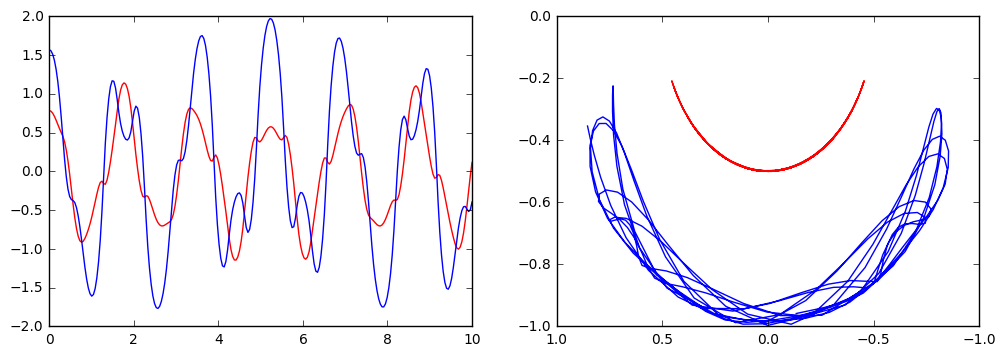

In [20]:
# dibujemos ahora los ángulos en función del tiempo

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")

x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label= u"péndulo1")
axes[1].plot(x2, y2, 'b', label= u"péndulo2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

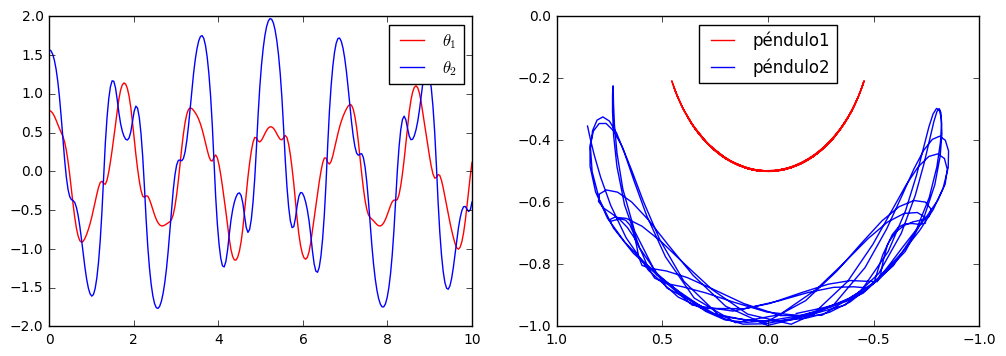

In [21]:
# dibujemos ahora los ángulos en función del tiempo

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label=r"$\theta_1$")
axes[0].plot(t, x[:, 1], 'b', label=r"$\theta_2$")
axes[0].legend(loc=0);


x1 = + L * sin(x[:, 0])
y1 = - L * cos(x[:, 0])

x2 = x1 + L * sin(x[:, 1])
y2 = y1 - L * cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label= "péndulo1")
axes[1].plot(x2, y2, 'b', label= "péndulo2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1])
axes[1].legend(loc=0);

Una animación simple del movimiento pendular, aunque hay posibilidades mejores.

In [22]:
from IPython.display import display, clear_output
import time

In [23]:
t_idx = 280; print("%05d" % t_idx)

00280


In [24]:
str("%05d" % t_idx)

'00280'

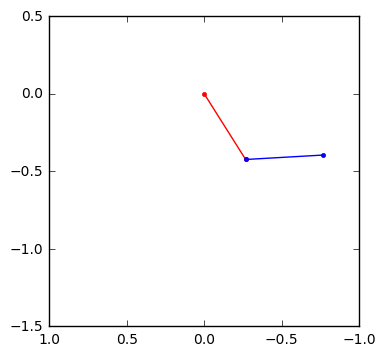

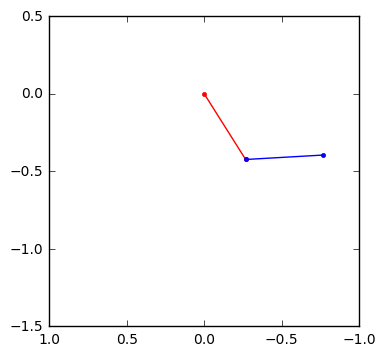

In [25]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):
    # print(t_idx, tt)
    x1 = + L * sin(x[t_idx, 0])
    y1 = - L * cos(x[t_idx, 0])

    x2 = x1 + L * sin(x[t_idx, 1])
    y2 = y1 - L * cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(0.1)
    fig.savefig("doble-pendulo-" + str("%05d" % t_idx) + ".png")

In [1]:
!pwd

/Users/pedrogonzalez/Downloads/Sesion_5


In [27]:
# rm *.png

In [2]:
ls *.png

doble-pendulo-00000.png  doble-pendulo-00067.png  doble-pendulo-00134.png
doble-pendulo-00001.png  doble-pendulo-00068.png  doble-pendulo-00135.png
doble-pendulo-00002.png  doble-pendulo-00069.png  doble-pendulo-00136.png
doble-pendulo-00003.png  doble-pendulo-00070.png  doble-pendulo-00137.png
doble-pendulo-00004.png  doble-pendulo-00071.png  doble-pendulo-00138.png
doble-pendulo-00005.png  doble-pendulo-00072.png  doble-pendulo-00139.png
doble-pendulo-00006.png  doble-pendulo-00073.png  doble-pendulo-00140.png
doble-pendulo-00007.png  doble-pendulo-00074.png  doble-pendulo-00141.png
doble-pendulo-00008.png  doble-pendulo-00075.png  doble-pendulo-00142.png
doble-pendulo-00009.png  doble-pendulo-00076.png  doble-pendulo-00143.png
doble-pendulo-00010.png  doble-pendulo-00077.png  doble-pendulo-00144.png
doble-pendulo-00011.png  doble-pendulo-00078.png  doble-pendulo-00145.png
doble-pendulo-00012.png  doble-pendulo-00079.png  doble-pendulo-00146.png
doble-pendulo-00013.png  doble-pendulo

In [ ]:
!ffmpeg -r 25 -i doble-pendulo-%05d.png doble-pendulo.avi

ffmpeg version 3.2 Copyright (c) 2000-2016 the FFmpeg developers
  built with Apple LLVM version 7.0.2 (clang-700.1.81)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/3.2 --enable-shared --enable-pthreads --enable-gpl --enable-version3 --enable-hardcoded-tables --enable-avresample --cc=clang --host-cflags= --host-ldflags= --enable-libmp3lame --enable-libx264 --enable-libxvid --enable-opencl --disable-lzma --enable-vda
  libavutil      55. 34.100 / 55. 34.100
  libavcodec     57. 64.100 / 57. 64.100
  libavformat    57. 56.100 / 57. 56.100
  libavdevice    57.  1.100 / 57.  1.100
  libavfilter     6. 65.100 /  6. 65.100
  libavresample   3.  1.  0 /  3.  1.  0
  libswscale      4.  2.100 /  4.  2.100
  libswresample   2.  3.100 /  2.  3.100
  libpostproc    54.  1.100 / 54.  1.100
Input #0, image2, from 'doble-pendulo-%05d.png':
  Duration: 00:00:08.00, start: 0.000000, bitrate: N/A
    Stream #0:0: Video: png, rgba(pc), 400x400 [SAR 3937:3937 DAR 1:1], 25 fps, 25 tbr, 25 tbn, 25 tb

In [ ]:
!ffmpeg -r 25 -i doble-pendulo-%05d.png doble-pendulo.mp4

In [3]:
ls doble-pendulo.*

doble-pendulo.avi  doble-pendulo.mkv  doble-pendulo.mp4


#### Ejemplo: oscilador armónico amortiguado 

Los problemas de EDOs son importantes en  Física Computacional, por lo que mostraremos otro ejemplo significativo: el oscilador armónico amortiguado. Este problema está bien descrito en la página de Wikipedia: http://en.wikipedia.org/wiki/Damping

La ecuación del movimiento para el oscilador amortiguado es:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

donde $x$ es la posición del oscilador, $\omega_0$ ees la frecuencia, y $\zeta$ es la ratio de amortiguación. Para escribir está EDO de segundo orden en forma estándard introducimos $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

En la implementación de este ejemplo añadiremos argumentos extra a la función de la parte derecha (RHS de "right hand side" en inglés) de la EDO, en vez de usar variables globales como hicimos en el ejemplo anterior.
Como consecuencia de estos argumentos extra en el RHS, necesitaremos pasar una palabra clave ("keyword" en inglés) como argumento `args` de la procedimiento `odeint`:

In [ ]:
def dy(y, t, zeta, w0):
    """
    La función RHS de la EDO del oscilador amortiguado
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [ ]:
# estado inicial: 
y0 = [1.0, 0.0]

In [ ]:
# partición en tiempo donde resolver la EDO
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

In [ ]:
# resolvemos la EDO para tres valores diferentes 
# del coeficiente de amortiguamiento

y1 = odeint(dy, y0, t, args=(0.0, w0)) # caso no amortiguado
y2 = odeint(dy, y0, t, args=(0.2, w0)) # amortiguación atenuada
y3 = odeint(dy, y0, t, args=(1.0, w0)) # amortiguamiento crítico
y4 = odeint(dy, y0, t, args=(5.0, w0)) # sobre amortiguado

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label=u"sin amortiguación", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label=u"amortiguación atenuada")
ax.plot(t, y3[:,0], 'b', label=u"amortiguación crítica")
ax.plot(t, y4[:,0], 'g', label=u"sobre amortiguación")
ax.legend();

##  Transformada de Fourier

Las transformadas de Fourier son una de las herramientas universales en  Física Computacional, que aparecen una y otra vez en diferentes contextos. SciPy proporciona funciones para acceder a la biblioteca clasica [FFTPACK](http://www.netlib.org/fftpack/) de NetLib, que es una muy eficiente y bien testeada biblioteca escrita en FORTRAN. La API de SciPy tiene algunos procedimientos o funciones adicionales, pero en conjunto la API está estrechamente relacionada con la biblioteca original en FORTRAN.

Para usar el módulo `fftpack` en un programa de python, incluirlo usando:

In [11]:
from numpy.fft import fftfreq
from scipy.fftpack import *

Para demostrar cómo realizar una transformada rápida de Fourier (FFT) con SciPy, echemos un vistazo a la FFT de la solución del oscilador amortiguado de la sección anterior:

In [12]:
N = len(t)
dt = t[1]-t[0]

# calcula la transformada rápida de Fourier 
# y2 es la solución del oscilador atenuado de la sección anterior
F = fft(y2[:,0]) 

# calcula las frecuencias de las componentes en F
w = fftfreq(N, dt)

NameError: name 't' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Ya que la señal es real, el espectro es simétrico y nosotros sólo tenemos que representar la parte que corresponda a las frecuencias postivas. Para extraer dicha parte de `w` y `F` podemos usar alguno de los trucos de indexado disponibles para arrays de NumPy:

In [ ]:
indices = where(w > 0) 
# selecciona sólo aquellos índices de los elementos que correspondan
# a frecuencias positivas
w_pos = w[indices]
F_pos = F[indices]

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

Como se esperaba, vemos ahora que el pico ("peak" en inglés) en el espectro está centrada alrededor del valor 1, que es precisamente la frecuencia usada en el ejemplo del oscilador amortiguado.

## Álgebra lineal

El módulo de álgebra lineal contiene numerosas funciones y procedimientos relacionados, incluyendo la resolución de sistemas lineales, cálculo de valores y vectores propios ("eigenvalue" y "eigenvectors" en inglés), diferentes operaciones matriciales (como por ejemplo la exponenciación matricial), cierto número de diferentes descomposctiones matriciales (SVD, LU, Cholesky), etc. 

Una documetación detallada está disponible en: http://docs.scipy.org/doc/scipy/reference/linalg.html

Aquí veremos como usar algunas de estas funciones y procedimientos:



###  Resolución de sistemas de ecuaciones lineales 

Los sistemas de ecuaciones lineales pueden escribirse de forma matricial

$A x = b$

donde $A$ es una matriz y $x, b$ son vectores, y pueden resolverse de la siguiente manera:

In [6]:
from scipy.linalg import *

In [13]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [14]:
x = solve(A, b)

x

array([-0.23333333,  0.46666667,  0.1       ])

In [15]:
# check
dot(A, x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

También podemoss hacer lo mismo con

$A X = B$

donde $A, B, X$ son matrices:

In [16]:
A = rand(3,3)
B = rand(3,3)

In [17]:
X = solve(A, B)

In [18]:
X

array([[-1.02911563, -6.43350414, -3.19476882],
       [ 1.34708938,  6.57685833,  4.66190382],
       [ 0.04809989, -0.71625136, -0.95357894]])

In [19]:
# comprobémoslo
norm(dot(A, X) - B)

4.335559509131367e-16

### Valores y vectores propios ("eigenvalues" y "eigenvectors")

El problema de valores y vectores propios para una matriz $A$:

$\displaystyle A v_n = \lambda_n v_n$

donde $v_n$ es el $n$-ésimo vector propio ("eigenvector") y $\lambda_n$ es el valor propio ("eigenvalue") correspondiente.

Para calcular los valores propios de una matriz, usar `eigvals` y para calcular tanto los valores como los vectores propios, usar la función `eig`:

In [20]:
evals = eigvals(A)

In [21]:
evals

array([ 2.07729817+0.j, -0.40976475+0.j, -0.05079059+0.j])

In [22]:
evals, evecs = eig(A)

In [23]:
evals

array([ 2.07729817+0.j, -0.40976475+0.j, -0.05079059+0.j])

In [24]:
evecs

array([[-0.36844263, -0.64503042,  0.6128986 ],
       [-0.53808161, -0.38832258, -0.76576328],
       [-0.75810172,  0.65813474,  0.19483813]])

Los vectores propios correspondientes al valor propio $n$-ésimo (almacenado en `evals[n]`) es la $n$-ésima *columna* en `evecs`, es decir `evecs[:,n]`. Para verificar esto, probemos a multiplicar estos posibles vectores propios por la matriz y comparemos a su vez con el producto del correspondiente valora propio por este mismo vector propio:

In [25]:
n = 1

norm(dot(A, evecs[:,n]) - evals[n] * evecs[:,n])

3.284083995358298e-16

Hay también otros procedimientos más especializados, como `eigh` para matrices Hermitianas. 

### Operaciones matriciales

In [26]:
# matriz inversa
inv(A)

array([[ -8.85198312,   8.3242791 ,  -1.37227931],
       [  9.26346191, -11.29347696,   3.8554029 ],
       [ -1.23393748,   3.63967759,  -1.50225538]])

In [27]:
# determinante
det(A)

0.04323313386372621

In [28]:
# distintos tipos de normas
norm(A, ord=2), norm(A, ord=Inf)

(2.0833412208663238, 2.7922257765066227)

### Matrices huecas

Matrices huecas ("sparse" en inglés) suelen ser útiles en las simulaciones numéricas que dan lugar a sistemas lineales de gran tamaño en las que la mayoría de los elementos de la matriz asociada son nulos. Scipy tiene buen soporte para este tipo de matrices, con operaciones básicas de álgebra lineal (como la resolución de los correspondientes sistemas de ecuaciones lineales, cálculo de valores y vectores propios, etc). Hay diversas  estrategias posibles para el almacenamiento de estas matrices huecas de manera eficiente. Alguna de las más comunes son las denominadas en forma coordinada (COO), en forma de listas de listas (LIL), y en forma de columna hueca comprimida CSC (o fila hueca comprimida, CSR). Cada formato posee sus ventajas y desventajas. La mayoría de los algorítmos computacionales (resolución de sistemas de ecuaciones lineales, multiplicación de matrices, etc) pueden ser implementados eficientemente usando los formatos CSR o CSC, pero no son tan intuitivos y fáciles de inicializar. Muy a menudo una matriz hueca se crea inicialmente en formato COO o LIL (con el que podemos eficientemente añadir elementos a la matriz), y convertirla posteriormente al formato CSC o CSR justo antes de ser usadas para los cálculos definitivos.

Para más información acerca de estos formatos para matrices huecas, consultar por ejemplo http://en.wikipedia.org/wiki/Sparse_matrix

Cuando creamos una matriz hueca debemos elegir con que formato deberá ser almacenada. Por ejemplo, 

In [29]:
from scipy.sparse import *

In [30]:
# matriz densa
M = array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]]); M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [31]:
# ahora la convertimos de densa a hueca con formato CSR
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [32]:
# y la volvemos a convertir de hueca a densa
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

Una manera más eficiente de crear matrices huecas: crear una matriz vacía en un formato comprimido determinado y a continuación rellenar sólo los valores no nulos de la matriz a partir de los índices apropiados (evitar crear una matriz densa potencialmente grande)

In [33]:
A = lil_matrix((4,4)) # matriz hueca 4x4 con formato LIL
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [34]:
A.todense()   # conversión a una matriz densa

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

Convirtiendo entre diferentes formatos de matrices huecas:

In [35]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [36]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [37]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

Nosotros podemos realizar cálculos con matrices huecas como con las matrices densas: 

In [38]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [39]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [40]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [41]:
A.dot(A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [42]:
v = array([1,2,3,4])[:,newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [43]:
# multiplicación de una matriz hueca por un vector
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [44]:
# el mismo resultado con una matriz densa
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimización

Optimización (encontrar mínimos o máximos de una función) es un vasto campo de las matemáticas, y la optimización de funciones complicadas o de muchas variables puede resultar una tarea compleja. Aquí sólo veremos algunos ejemplos simples. Para una introducción más detallada del paquete de optimización de SciPy consultar: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para usar el módulo de optimización en Scipy habrá que empezar con importar el módulo `optimize`:

In [45]:
from scipy import optimize

### Buscando un mínimo

Veamos primero cómo encontrar el mínimo de una función sencilla de una sóla variable:

In [46]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

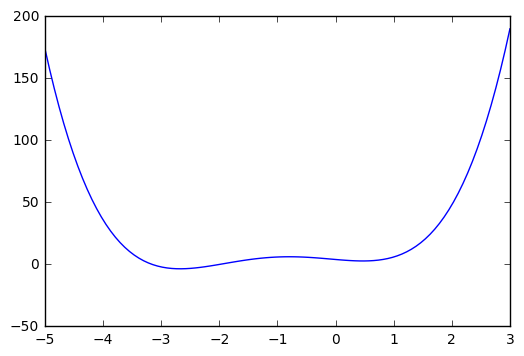

In [47]:
fig, ax  = plt.subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

Podemos usar la función o procedimiento `fmin_bfgs` para buscar el mínimo de la función:

In [48]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

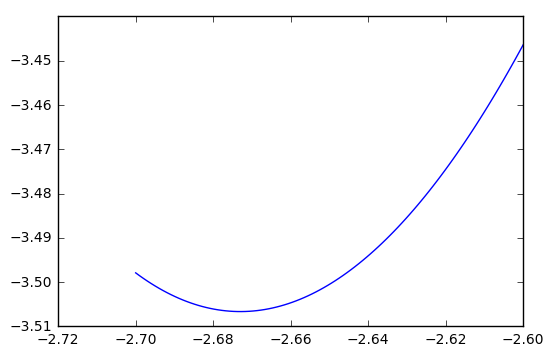

In [49]:
fig, ax  = plt.subplots()
x = linspace(-2.7, -2.6, 100)
ax.plot(x, f(x));

In [50]:
optimize.fmin_bfgs(f, 0.5) 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

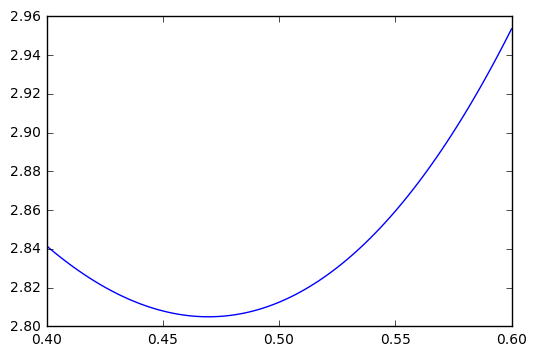

In [51]:
fig, ax  = plt.subplots()
x = linspace(0.4, 0.6, 100)
ax.plot(x, f(x));

También podemos usar los procedimientos `brent` o `fminbound`, que tienen una sintaxis algo diferente y usan diferentes algoritmos. 

In [52]:
optimize.brent(f)

0.46961743402759754

In [53]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Encontrando la solución  de una ecuación o cero de una función 

Para buscar la raíz de una ecuación de la forma $f(x) = 0$ podemos usar el procedimiento `fsolve`, que requiere un valor o estimación inicial: 

In [54]:
omega_c = 3.0
def f(omega):
    # una ecuación transcendental: frecuencias de resonancia
    # de un resonador de microondas de tipo low-Q SQUID
    return tan(2*pi*omega) - omega_c/omega

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide


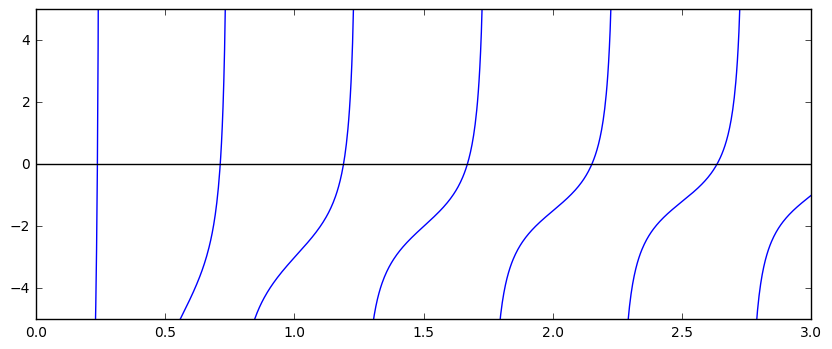

In [55]:
fig, ax  = plt.subplots(figsize=(10,4))
x = linspace(0, 3, 1000)
y = f(x)
mask = where(abs(y) > 50)
x[mask] = y[mask] = NaN 
# nos deshacemos de la línea vertical cuando la función cambie de signo
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [56]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [57]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [58]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## Interpolación

La interpolación resulta una tarea simple y asequible en Scipy: gracias al procedimiento `interp1d`, con adecuados arrays describiendo los datos X e Y, devolverá un objeto que se comporta como una función que podrá evaluarse posteriormente para un valor arbitrario de x (en el rango cubierto por X), devolviendo el correspondiente valor interpolado de y:

In [59]:
from scipy.interpolate import *

In [60]:
def f(x):
    return sin(x)

In [61]:
n = arange(0, 10)  
x = linspace(0, 9, 100)

y_sim = f(n) + 0.1 * randn(len(n)) # medidas simuladas con ruido
y_real = f(x)

linear_interpolation = interp1d(n, y_sim)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_sim, kind='cubic')
y_interp3 = cubic_interpolation(x)

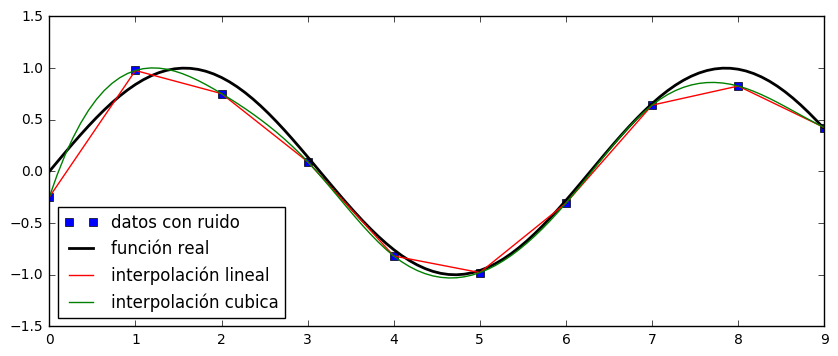

In [62]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_sim, 'bs', label='datos con ruido')
ax.plot(x, y_real, 'k', lw=2, label=u'función real')
ax.plot(x, y_interp1, 'r', label=u'interpolación lineal')
ax.plot(x, y_interp3, 'g', label=u'interpolación cubica')
ax.legend(loc=3);

## Estadística

El módulo `scipy.stats` contiene un gran número de distribuciones y tests estadísticos. Para una documentación completa de todas sus características, consultar http://docs.scipy.org/doc/scipy/reference/stats.html.

Hay otro paquete de Python muy completo y poderoso para modelado estadístico denominado 'statsmodels'. Consultar http://statsmodels.sourceforge.net para más detalles.

In [63]:
from scipy import stats

In [64]:
# Ahora creamos una variable aleatoria (discreta) 
# con distribución de Poisson

X = stats.poisson(3.5) 
# distribución de fotones para un estado coherente con n=3.5 fotones

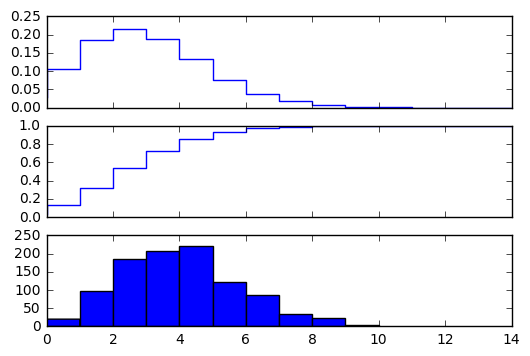

In [65]:
n = arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# dibujamos la función de probabilidad (FDP)
# (PMF, de "probability mass function" en inglés)
axes[0].step(n, X.pmf(n))

# así como la función de distribución acumulada 
# ("commulative distribution function" (CDF) en inglés)
axes[1].step(n, X.cdf(n))

# Finalmente mostramos el histograma de 1000 realizaciones
# aleatorias de la variable estocástica X
axes[2].hist(X.rvs(size=1000));

In [66]:
# Ahora crearemos una variable aleatoria (contínua) 
# con distribución normal
Y = stats.norm()

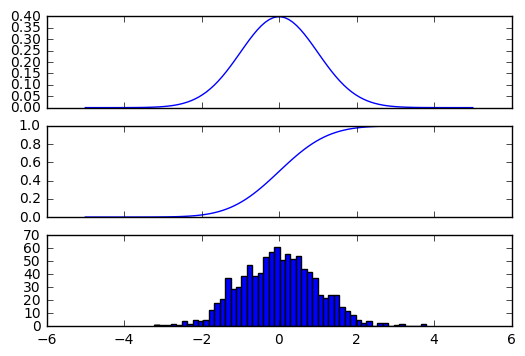

In [67]:
x = linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# representamos la función de densidad de probabilidad (PDF)
axes[0].plot(x, Y.pdf(x))

# y la función de distribución acumulada (CDF)
axes[1].plot(x, Y.cdf(x));

# así como el histograma con 1000 realizaciones aleatorias
# de la variable estocástica  Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Estadísticos obtenidos a partir de las distribuciones anteriores:

In [68]:
X.mean(), X.std(), X.var() #  distribución de Poission

(3.5, 1.8708286933869707, 3.5)

In [69]:
Y.mean(), Y.std(), Y.var() #  distribución normal

(0.0, 1.0, 1.0)

### Tests estadísticos

Verifiquemos por ejemplo si dos conjuntos de datos aleatorios (en principio independientes) provienen o no de la misma distribución:

In [70]:
t_estadistico, p_valor = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print ("t-estadistico =", t_estadistico)
print ("p-valor =", p_valor)

t-estadistico = -1.0778157269
p-valor = 0.281246108875


Ya que el p-valor es bastante grande no podemos rechazar la hipótesis de que ambos conjuntos de datos aleatorios tengan medias *diferentes*.

Para chequear si la media de una de las muestras de datos tiene media 0.1 (aunque la verdadera media es 0.0):

In [71]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-2.9459258216400834, pvalue=0.0032946136400891792)

Este p-valor tan bajo significa que ahora sí que podemos rechazar esta hipótesis de que la media de la variable aleatoria Y es 0.1.

In [72]:
Y.mean()

0.0

Veámos qué pasa ahora cuando pasamos este mismo test con los valores correctos

In [73]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=-0.37295695153115788, pvalue=0.70925960053673964)

## Lecturas adicionales

* http://www.scipy.org - La página web oficial del proyecto SciPy.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - Un tutorial sobre cómo empezar a usar SciPy. 
* https://github.com/scipy/scipy/ - El código fuente de SciPy. 

## Versiones de los paquetes de Python

In [77]:
%reload_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 14.5.0 x86_64 i386 64bit
numpy 1.11.1
matplotlib 1.5.3
scipy 0.18.1
Fri May 04 14:24:55 2018 CEST